In [1]:
# import required libraries and modules
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# load dataset 
dataset = pd.read_csv('ClaMP_Integrated.csv')

# analyze the dataset
dataset

,e_cblp,e_cp,e_cparhdr,e_maxalloc,e_sp,e_lfanew,NumberOfSections,CreationYear,FH_char0,FH_char1,...,sus_sections,non_sus_sections,packer,packer_type,E_text,E_data,filesize,E_file,fileinfo,class
0,144,3,4,65535,184,128,8,1,0,1,...,3,5,0,NoPacker,6.530803,1.107119,2974071,5.854144,0,0
1,144,3,4,65535,184,128,5,1,1,1,...,0,5,1,VideoLanClient,6.555146,4.123266,26440904,7.993374,1,0
2,144,3,4,65535,184,128,8,1,0,1,...,3,5,0,NoPacker,6.610184,2.428137,541683,6.566081,0,0
3,144,3,4,65535,184,128,6,1,0,1,...,1,5,0,NoPacker,6.632689,1.913984,260096,6.656836,0,0
4,144,3,4,65535,184,240,4,1,1,1,...,0,4,0,NoPacker,6.727070,7.963265,195072,6.867009,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5205,144,3,4,65535,184,200,2,1,1,1,...,0,2,1,PECompactV2XBitsumTechnologies,7.997171,0.000000,137216,7.929623,0,1
5206,144,3,4,65535,184,256,9,1,0,1,...,5,4,0,NoPacker,7.998838,0.081539,862720,7.984551,1,1
5207,144,3,4,65535,184,248,11,1,0,1,...,7,4,0,NoPacker,7.999070,0.264678,865280,7.978608,0,1
5208,144,3,4,65535,184,232,11,1,0,1,...,7,4,0,NoPacker,7.999131,0.244351,854016,7.983393,0,1


In [3]:
# identify the features
# source variables
X = dataset.drop(['packer_type', 'class'], axis=1)
# target variable to be predicted
y = dataset['class']

In [4]:
# split dataset into Testing and Training
# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 

n_neighbors:  1, Accuracy: 92.13051823416507
n_neighbors:  2, Accuracy: 90.59500959692899
n_neighbors:  3, Accuracy: 90.88291746641075
n_neighbors:  4, Accuracy: 91.36276391554703
n_neighbors:  5, Accuracy: 91.07485604606525
n_neighbors:  6, Accuracy: 90.30710172744722
n_neighbors:  7, Accuracy: 90.30710172744722
n_neighbors:  8, Accuracy: 89.9232245681382
n_neighbors:  9, Accuracy: 90.01919385796545
n_neighbors: 10, Accuracy: 89.15547024952015
n_neighbors: 11, Accuracy: 88.96353166986565
n_neighbors: 12, Accuracy: 89.0595009596929
n_neighbors: 13, Accuracy: 89.44337811900192
n_neighbors: 14, Accuracy: 89.25143953934742
n_neighbors: 15, Accuracy: 89.44337811900192
n_neighbors: 16, Accuracy: 88.96353166986565
n_neighbors: 17, Accuracy: 88.96353166986565
n_neighbors: 18, Accuracy: 88.57965451055662
n_neighbors: 19, Accuracy: 89.44337811900192
n_neighbors: 20, Accuracy: 89.25143953934742


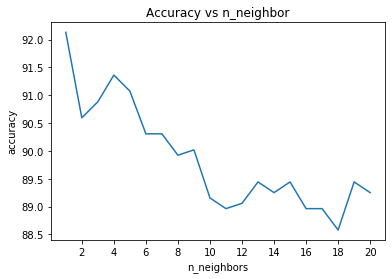

In [5]:
# figure out number of n_neighbors that is a better choice 
agg_acc = []

min_range = 1
max_range = 20
for i in range(min_range, max_range+1, 1):
    classifier = KNeighborsClassifier(n_neighbors = i)
    classifier.fit(X_train, y_train)
    score = classifier.score(X_test,y_test) * 100
    print('n_neighbors: {:2d}, Accuracy: {}'.format(i, score))
    agg_acc.append(score)
    
# visualizing accuracy with n_neighbors
plt.plot(range(min_range, max_range+1), agg_acc)
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.xticks(range(2, max_range+1,2))
plt.title('Accuracy vs n_neighbor')
plt.show()

In [6]:
# standardize features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
classifier = KNeighborsClassifier(n_neighbors = 4)
classifier.fit(X_train, y_train)
score = classifier.score(X_test,y_test) * 100
print("Accuracy:",score)

Accuracy: 97.31285988483685


In [8]:
# false positive rate of the model
y_pred = classifier.predict(X_test)
CM = confusion_matrix(y_test, y_pred)
print("False positive rate : %f %%" % ((CM[0][1] / float(sum(CM[0])))*100))

False positive rate : 2.941176 %


In [9]:
# read the dataset again
full_test_dataset = pd.read_csv('ClaMP_Integrated.csv')
full_test_dataset

,e_cblp,e_cp,e_cparhdr,e_maxalloc,e_sp,e_lfanew,NumberOfSections,CreationYear,FH_char0,FH_char1,...,sus_sections,non_sus_sections,packer,packer_type,E_text,E_data,filesize,E_file,fileinfo,class
0,144,3,4,65535,184,128,8,1,0,1,...,3,5,0,NoPacker,6.530803,1.107119,2974071,5.854144,0,0
1,144,3,4,65535,184,128,5,1,1,1,...,0,5,1,VideoLanClient,6.555146,4.123266,26440904,7.993374,1,0
2,144,3,4,65535,184,128,8,1,0,1,...,3,5,0,NoPacker,6.610184,2.428137,541683,6.566081,0,0
3,144,3,4,65535,184,128,6,1,0,1,...,1,5,0,NoPacker,6.632689,1.913984,260096,6.656836,0,0
4,144,3,4,65535,184,240,4,1,1,1,...,0,4,0,NoPacker,6.727070,7.963265,195072,6.867009,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5205,144,3,4,65535,184,200,2,1,1,1,...,0,2,1,PECompactV2XBitsumTechnologies,7.997171,0.000000,137216,7.929623,0,1
5206,144,3,4,65535,184,256,9,1,0,1,...,5,4,0,NoPacker,7.998838,0.081539,862720,7.984551,1,1
5207,144,3,4,65535,184,248,11,1,0,1,...,7,4,0,NoPacker,7.999070,0.264678,865280,7.978608,0,1
5208,144,3,4,65535,184,232,11,1,0,1,...,7,4,0,NoPacker,7.999131,0.244351,854016,7.983393,0,1


In [10]:
# classify if the specific row is a malware or not
results_with_names = pd.concat([full_test_dataset['class']==1, full_test_dataset['class']==0], axis=1)
results_with_names.columns = ['Malware', 'Not Malware']
results_with_names

,Malware,Not Malware
0,False,True
1,False,True
2,False,True
3,False,True
4,True,False
...,...,...
5205,True,False
5206,True,False
5207,True,False
5208,True,False


In [11]:
# before modification
classified = full_test_dataset['class']
classified

0       0
1       0
2       0
3       0
4       1
       ..
5205    1
5206    1
5207    1
5208    1
5209    1
Name: class, Length: 5210, dtype: int64

In [12]:
# replace them into either Malware or Not Malware
classified = full_test_dataset['class'].replace({1:'Malware', 0:'Not Malware'})
classified

0       Not Malware
1       Not Malware
2       Not Malware
3       Not Malware
4           Malware
           ...     
5205        Malware
5206        Malware
5207        Malware
5208        Malware
5209        Malware
Name: class, Length: 5210, dtype: object

In [13]:
# count the number of Malware and Not Malware data
classified.value_counts()

Malware        2722
Not Malware    2488
Name: class, dtype: int64